In [85]:
import pandas as pd
from plotnine import *

### Data Set-up
0. Import the data and declare your package dependencies.

In [86]:
data = pd.read_csv('avocado-updated-2020.csv')

1. Briefly describe the data set. What information does it contain?  
    Date: The date of the observation  
    average_price: The average price of a single avocado  
    total_volume: Total number of avocados sold  
    4046: Total number of avocados with PLU 4046 sold, which is small avocado  
    4225: Total number of avocados with PLU 4225 sold, which is large avocado  
    4770: Total number of avocados with PLU 4770 sold, which is extra large avocado  
    total_bags: Total number of avocado bags sold  
    small_bags: Total number of small avocado bags sold  
    large_bags: Total number of large avocado bags sold  
    xlarge_bags: Total number of extra large avocado bags sold  
    type: conventional or organic  
    year: the year  
    geography: the city or region of the observation

In [87]:
%%capture
data.info()

2. Clean the data in any way you see fit.  
    "Region"  
    The "geography" column contains various levels of regions, including metro regions, states, major regions, and total summaries. 
    We created a new column called "Region" to represent the level of each regions: national, states, regions, or metro.
    national = ['Total U.S.']  
    states = ['California', 'South Carolina']  
    regions= ['Midsouth', 'Northeast', 'Plains', 'South Central', 'Southeast', 'West','Great Lakes']
    metro = others

    "small"
    We change the column name from "4046" to "small"

    "large"
    We change the column name from "4225" to "large"

    "xlarge"
    We change the column name from "4770" to "xlarge"

    "sales"
    We created a new column called "sales" = "small" + "large" + "xlarge" = "4046" + "4225" + "4770"

    "total_bags_N"  
    We notice that "total_bags" should represent the sum of small_bags, large_bags, and xlarge_bags. However, some of the data did not add up. Therefore, we create a new column called "total_bags_N" to accurately sum the values of small_bags, large_bags, and xlarge_bags, which will be used as the total number of avocado bags sold.

    "total_volume_N"  
    We also observe that "total_volume" should be the sum of 4046, 4225, 4770, and total_bags_N. However, some of the data did not add up. Thus, we create a new column called "total_volume_N" to accurately sum the values of 4046, 4225, 4770, and total_bags_N, which will be used as the total volume of avocados sold.
    



In [88]:
%%capture
data["geography"].unique()

In [89]:
#assigning each city to five regions
national = ['Total U.S.']
states = ['California', 'South Carolina']
regions= ['Midsouth', 'Northeast', 'Plains', 'South Central', 'Southeast', 'West','Great Lakes']

In [90]:
data["Region"] = 'Metro'
data.loc[data['geography'].isin(national), 'Region'] = 'National'
data.loc[data['geography'].isin(states), 'Region'] = 'States'
data.loc[data['geography'].isin(regions), 'Region'] = 'Regional'

In [91]:
#add total_bags_N and total_volume_N
data["total_bags_N"] = data["small_bags"] + data["large_bags"] + data["xlarge_bags"]
data["total_volume_N"] = data["4046"] + data["4225"] + data["4770"] + data["total_bags_N"]
data["small"] = data["4046"]
data["large"] = data["4225"]
data["xlarge"] = data["4770"]
data["sales"] = data["small"] + data["large"] + data["xlarge"]


In [92]:
data_clean = data[['date', 'year', 'geography', 'Region', 'type', 'average_price', 'small', 'large', 'xlarge', 'sales', 'total_volume_N','small_bags', 'large_bags', 'xlarge_bags','total_bags_N']]

Dataset after cleaning:

In [93]:
data_clean

,date,year,geography,Region,type,average_price,small,large,xlarge,sales,total_volume_N,small_bags,large_bags,xlarge_bags,total_bags_N
0,2015-01-04,2015,Albany,Metro,conventional,1.22,2819.50,28287.42,49.90,31156.82,40873.28,9186.93,529.53,0.00,9716.46
1,2015-01-04,2015,Albany,Metro,organic,1.79,57.42,153.88,0.00,211.30,1373.95,1162.65,0.00,0.00,1162.65
2,2015-01-04,2015,Atlanta,Metro,conventional,1.00,364302.39,23821.16,82.15,388205.70,435021.49,16707.15,30108.64,0.00,46815.79
3,2015-01-04,2015,Atlanta,Metro,organic,1.76,1500.15,938.35,0.00,2438.50,3846.69,1071.35,336.84,0.00,1408.19
4,2015-01-04,2015,Baltimore/Washington,Metro,conventional,1.08,53987.31,552906.04,39995.03,646888.38,788025.06,137146.07,3990.61,0.00,141136.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,2020,Total U.S.,National,organic,1.47,67544.48,97996.46,2617.17,168158.11,1583036.21,906711.52,480191.83,27974.75,1414878.10
33041,2020-11-29,2020,West,Regional,conventional,0.91,1352877.53,589061.83,19741.90,1961681.26,5752346.55,2197611.02,1531530.14,61524.13,3790665.29
33042,2020-11-29,2020,West,Regional,organic,1.48,13273.75,19341.09,636.51,33251.35,289961.27,122606.21,134103.71,0.00,256709.92
33043,2020-11-29,2020,West Tex/New Mexico,Metro,conventional,0.67,234688.01,80205.15,10543.63,325436.79,822818.75,285764.11,210808.02,809.83,497381.96


### Exercises
3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

The geography list ranked by the volume of organic, small Hass avocados in 2017 is as follows:

In [97]:
data_clean[(data_clean["year"] == 2017) & (data_clean["type"] == "organic") & (data_clean["Region"]=="Regional")].groupby('geography')['small'].sum().sort_values(ascending=False)

geography
West             1870206.29
South Central    1717104.19
Northeast         925832.36
Southeast         285124.34
Great Lakes       202487.68
Midsouth          186395.50
Plains            168583.40
Name: small, dtype: float64

In [126]:
%%capture
data_clean[(data_clean["year"] == 2017) & (data_clean["type"] == "organic") & (data_clean["Region"]=="Regional")].groupby('geography')['small'].sum().sort_values(ascending=False).idxmax()

The major geographical region sold the most total organic, small Hass avocados in 2017 is West

4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [102]:
%%capture
data_clean["date"] = pd.to_datetime(data_clean["date"])
data_clean["year"] = data_clean["date"].dt.year
data_clean["month"] = data_clean["date"].dt.month
data_clean["day"] = data_clean["date"].dt.day

In [103]:
%%capture
data_clean.groupby('month')['total_volume_N'].mean().sort_values(ascending=False).idxmax()

The month with the highest average volume of avocado sales is May.

5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

The metro area geography list ranked by the volume avocados is as follows:

In [104]:
data_clean[(data_clean["Region"]=='Metro')].groupby('geography')['total_volume_N'].mean().sort_values(ascending=False)

geography
Los Angeles             1.567566e+06
New York                8.631282e+05
Dallas/Ft. Worth        7.127519e+05
Houston                 6.876533e+05
Phoenix/Tucson          6.250348e+05
West Tex/New Mexico     4.607743e+05
Denver                  4.541332e+05
Baltimore/Washington    4.522298e+05
San Francisco           4.480668e+05
Chicago                 4.210210e+05
Miami/Ft. Lauderdale    3.786677e+05
Portland                3.489261e+05
Boston                  3.335499e+05
Seattle                 3.307232e+05
Atlanta                 3.251538e+05
San Diego               2.839288e+05
Philadelphia            2.588769e+05
Northern New England    2.564339e+05
Sacramento              2.439074e+05
Tampa                   2.428563e+05
Detroit                 2.281373e+05
Orlando                 2.220610e+05
Las Vegas               1.777270e+05
Raleigh/Greensboro      1.764368e+05
Hartford/Springfield    1.709231e+05
New Orleans/Mobile      1.546840e+05
Harrisburg/Scranton     1.53

In [124]:
%%capture
data_clean[(data_clean["Region"]=='Metro')].groupby('geography')['total_volume_N'].sum().sort_values(ascending=False).idxmax()

The metro area geographical region sold the most total avocados is Los Angeles.

In [107]:
top5 = data_clean[(data_clean["Region"]=='Metro')].groupby('geography')['total_volume_N'].mean().sort_values(ascending=False).head(5).index
data_top5 = data_clean[data_clean['geography'].isin(top5)]

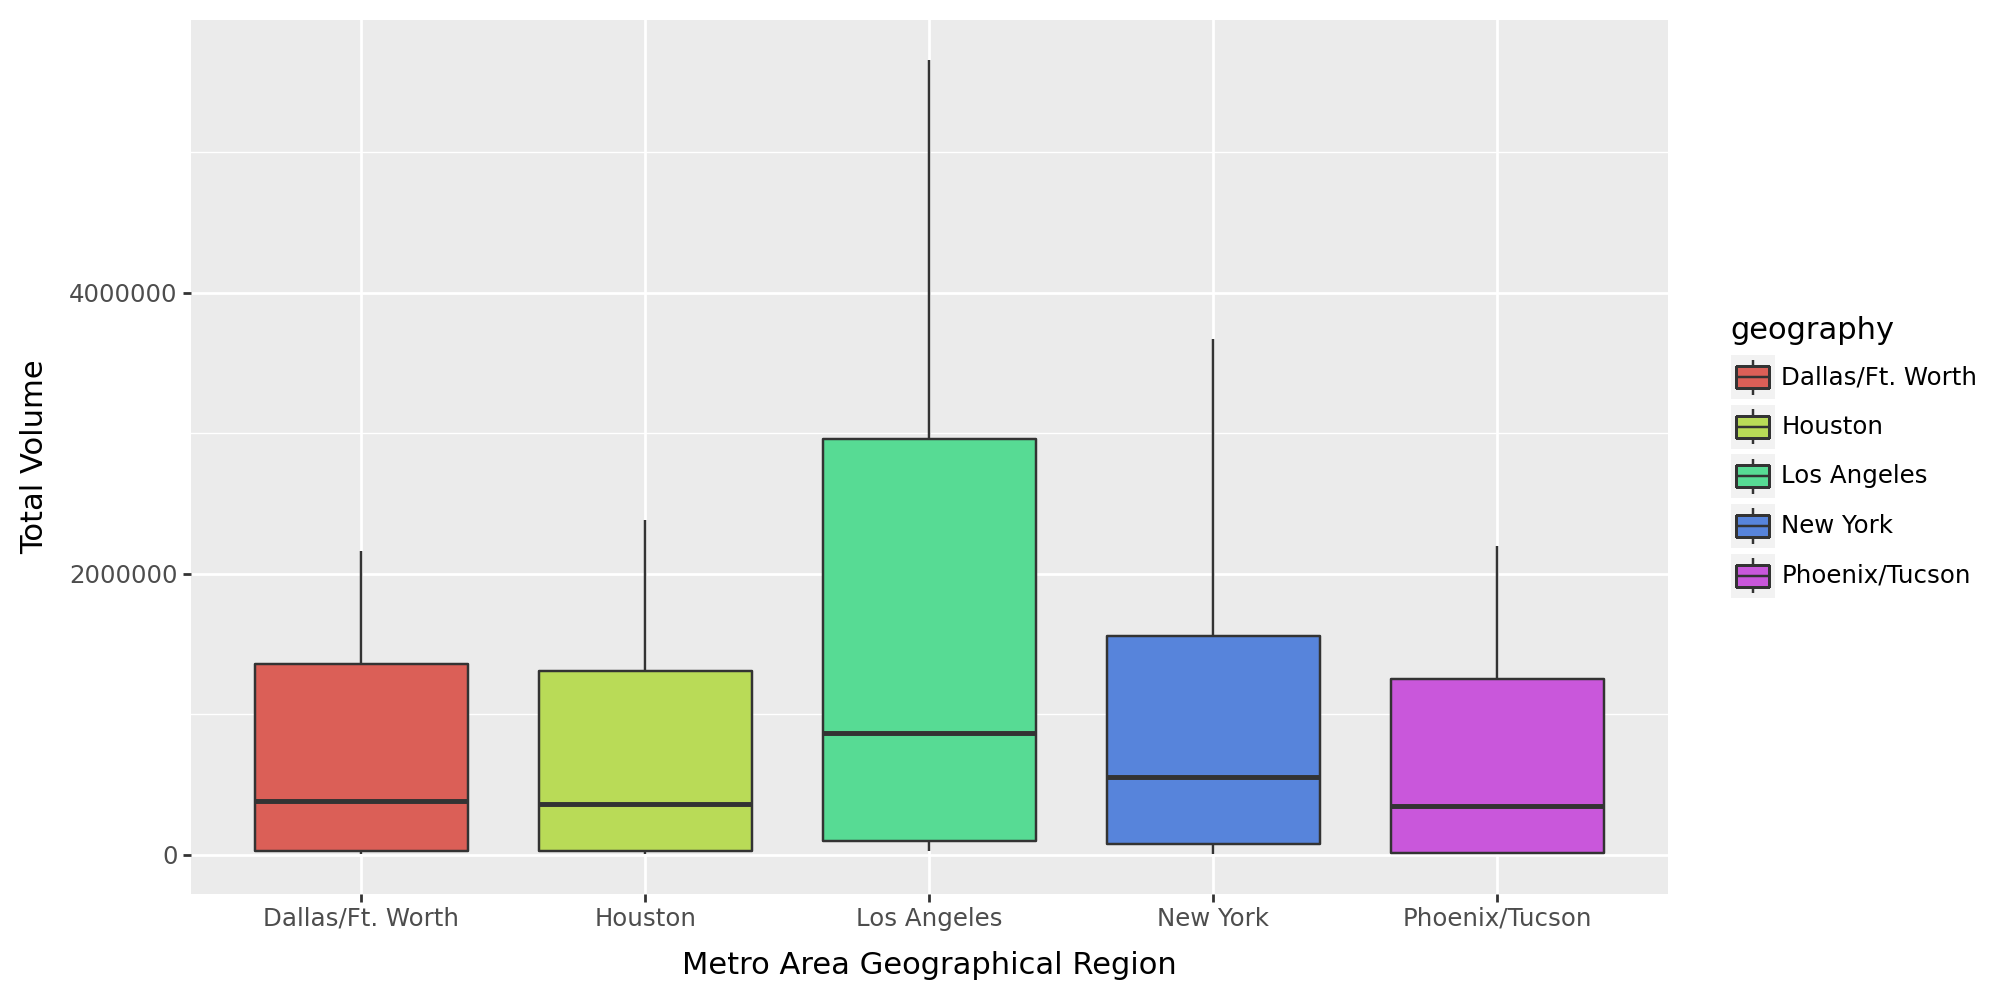

In [108]:
(ggplot(data_top5,aes(x="geography",y="total_volume_N",fill="geography"))
+ labs(x= "Metro Area Geographical Region", y="Total Volume")
+ geom_boxplot()
+ theme(figure_size=(10, 5))
)

### Pivoting
6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [109]:
data_clean_ca = data_clean[data_clean["geography"].isin(['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco'])].reset_index(drop=True)

In [110]:
data_clean_ca

,date,year,geography,Region,type,average_price,small,large,xlarge,sales,total_volume_N,small_bags,large_bags,xlarge_bags,total_bags_N,month,day
0,2015-01-04,2015,Los Angeles,Metro,conventional,0.85,1837999.65,524430.47,64225.78,2426655.90,2682159.95,215571.80,36981.72,2950.53,255504.05,1,4
1,2015-01-04,2015,Los Angeles,Metro,organic,1.25,47721.51,1723.40,0.00,49444.91,54495.54,5050.63,0.00,0.00,5050.63,1,4
2,2015-01-04,2015,Sacramento,Metro,conventional,1.05,110693.69,270107.61,9737.50,390538.80,430138.88,39600.08,0.00,0.00,39600.08,1,4
3,2015-01-04,2015,Sacramento,Metro,organic,1.33,3727.52,4327.52,0.00,8055.04,9213.49,1158.45,0.00,0.00,1158.45,1,4
4,2015-01-04,2015,San Diego,Metro,conventional,0.94,244152.26,165299.33,15302.75,424754.34,461607.33,30884.29,5595.00,373.70,36852.99,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2020-11-29,2020,Sacramento,Metro,organic,1.43,3303.69,2057.03,0.00,5360.72,23531.38,18144.54,26.12,0.00,18170.66,11,29
2444,2020-11-29,2020,San Diego,Metro,conventional,1.12,104509.99,19988.45,7210.47,131708.91,469356.72,189341.36,127701.64,20604.81,337647.81,11,29
2445,2020-11-29,2020,San Diego,Metro,organic,1.95,894.63,838.11,0.00,1732.74,25799.95,9691.46,14375.75,0.00,24067.21,11,29
2446,2020-11-29,2020,San Francisco,Metro,conventional,1.50,128555.43,136718.24,5597.21,270870.88,644141.37,159276.65,207760.32,6233.52,373270.49,11,29


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

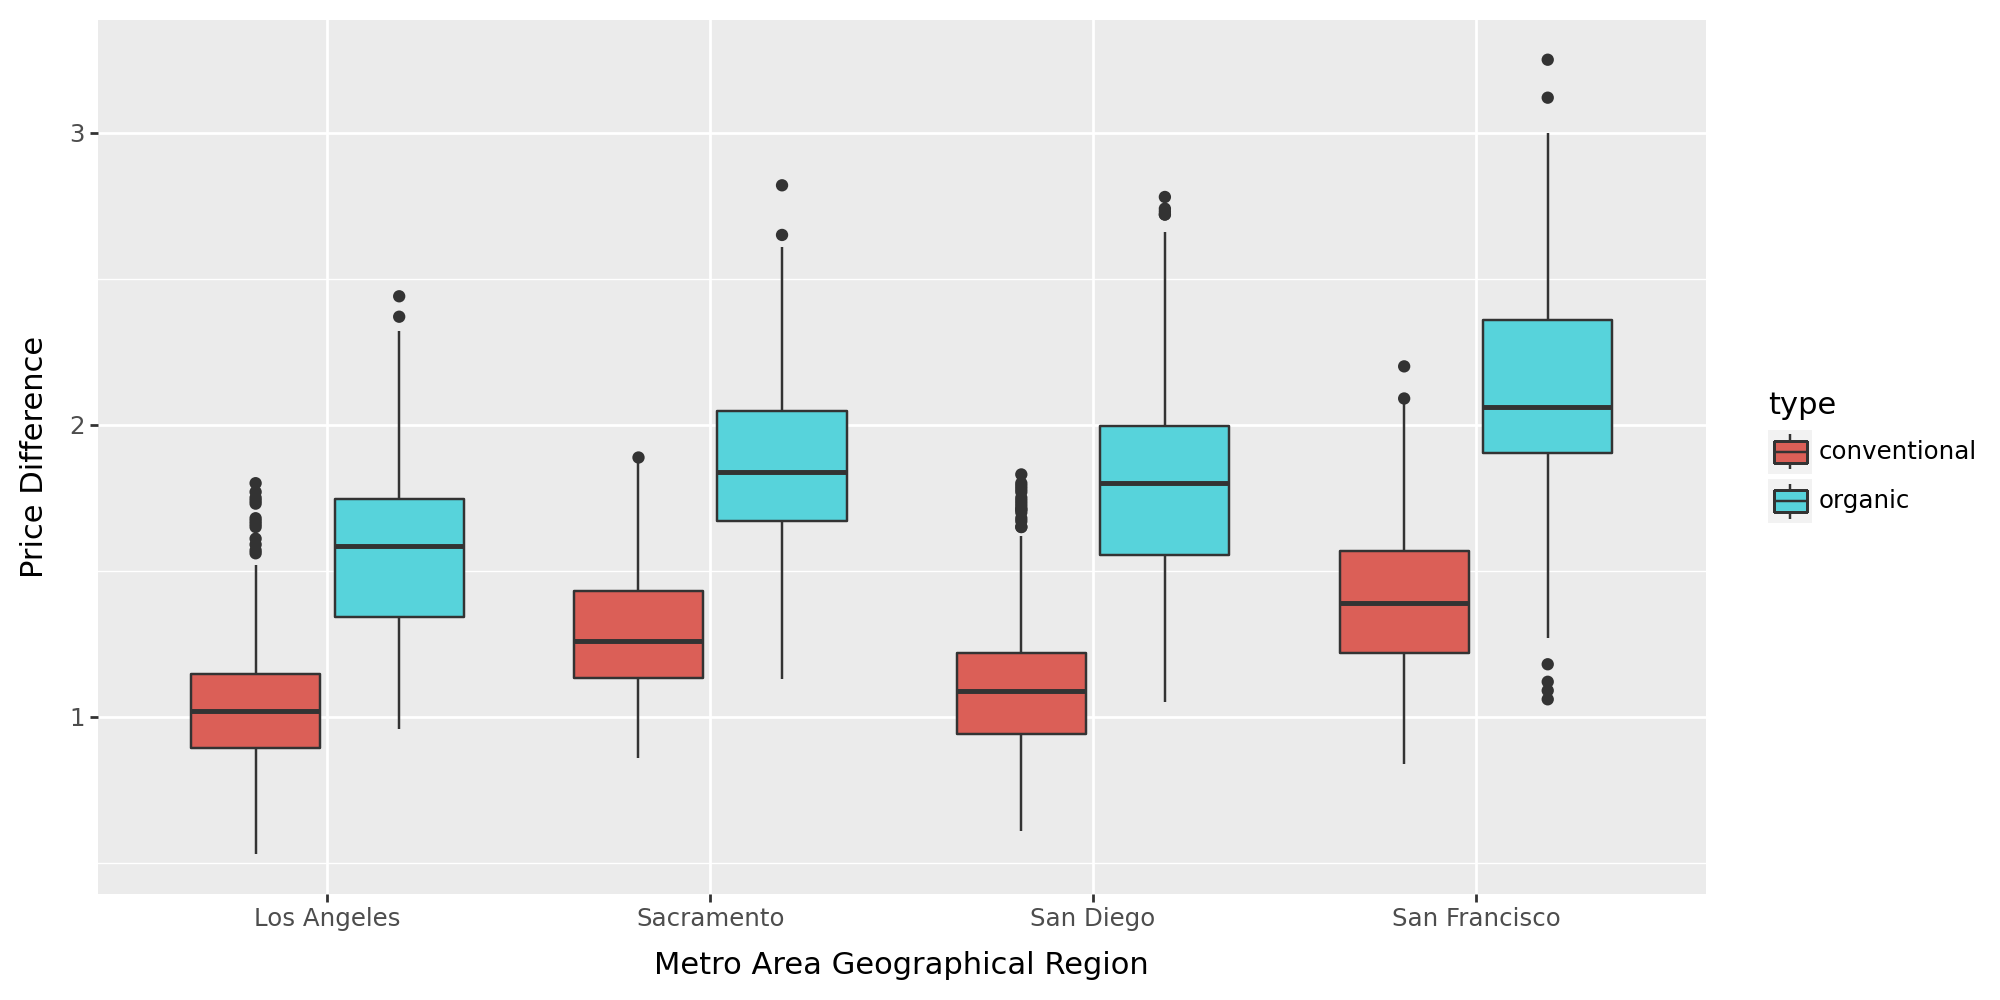

In [111]:
(ggplot(data_clean_ca, aes(x='geography', y='average_price',fill='type'))
+ geom_boxplot()
+ labs(x= "Metro Area Geographical Region", y="Price Difference")
+ theme(figure_size=(10, 5))
)

From this box plot, we can see that San Franciso appears to have the widest difference between organic and conventional prices. To precisely calculate the difference, we will create a dataset with a column called 'price difference', which will represent the price difference between organic and conventional prices on the same day in the same metro region.  
We first seperate the data into two datasets: one for organic and one for conventional. Then, we merge the two datasets to create two columns 'organic price' and 'conventional price'. By subtracting 'organic price' and 'conventional price', we will get the new column 'price difference'.  
We plot a box plot to see the spread of price differece across different regions. We can see San Franciso has the widest difference between organic and conventional avocado prices, followed by San Diego, Sacramento, and Los Angeles.

In [112]:
data_ca_organic = data_clean_ca[data_clean_ca['type']=='organic'][['date','geography', 'average_price','type']]
data_ca_normal = data_clean_ca[data_clean_ca['type']=='conventional'][['date','geography', 'average_price','type']]
data_ca_price = data_ca_organic.merge(data_ca_normal, on=['date','geography'],suffixes=('_organic','_conventional'))
data_ca_price['price_difference'] = data_ca_price['average_price_organic'] - data_ca_price['average_price_conventional']
data_ca_price = data_ca_price[['date', 'geography', 'average_price_organic','average_price_conventional', 'price_difference']]


The summary of statistics for the difference between organic and conventional avocado prices across different regions is shown below:

In [113]:
data_ca_price.groupby('geography')['price_difference'].describe()

,count,mean,std,min,25%,50%,75%,max
geography,,,,,,,,
Los Angeles,306.0,0.527778,0.188143,0.07,0.40,0.53,0.6700,1.21
Sacramento,306.0,0.578497,0.270029,-0.09,0.36,0.54,0.7775,1.43
San Diego,306.0,0.684510,0.211286,0.20,0.52,0.67,0.8300,1.41
San Francisco,306.0,0.718954,0.333801,0.02,0.46,0.71,0.9475,1.59


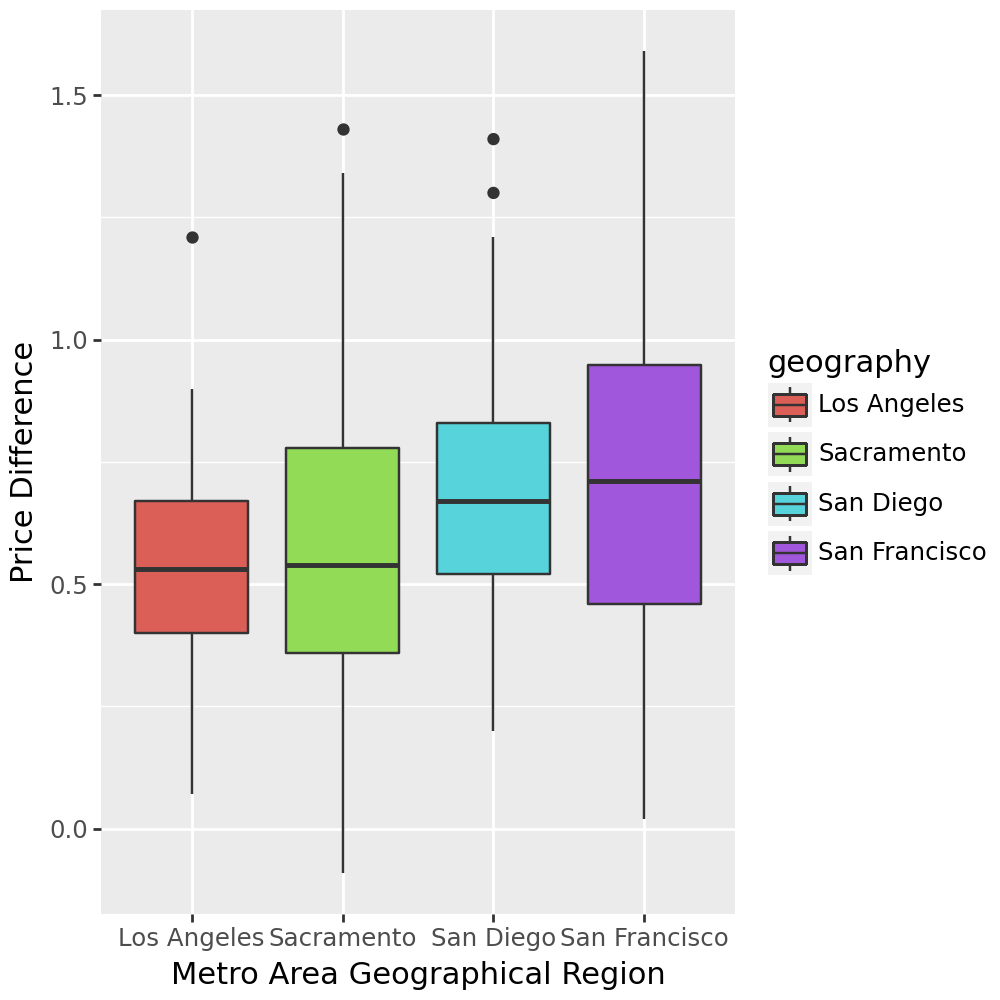

In [114]:
(ggplot(data_ca_price, aes(x='geography', y='price_difference', fill='geography'))
+ geom_boxplot()
+ labs(x= "Metro Area Geographical Region", y="Price Difference")
+ theme(figure_size=(5, 5))
)

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [115]:
data_size_ca = data_clean_ca.groupby(['geography','type']).agg({
    'small':'mean',
    'large':'mean',
    'xlarge':'mean',
    'sales':'mean'
}).reset_index()

In [116]:
#transfer quantity to porportion
data_size_ca['small'] = data_size_ca['small']/data_size_ca['sales']
data_size_ca['large'] = data_size_ca['large']/data_size_ca['sales']
data_size_ca['xlarge'] = data_size_ca['xlarge']/data_size_ca['sales']

In [117]:
data_size_ca = data_size_ca.melt(id_vars=['geography', 'type'], value_vars=["small", "large", "xlarge"],
                  var_name = "size", 
                  value_name = "proportion")

In [118]:
data_size_ca

,geography,type,size,proportion
0,Los Angeles,conventional,small,0.684389
1,Los Angeles,organic,small,0.409677
2,Sacramento,conventional,small,0.361688
3,Sacramento,organic,small,0.396045
4,San Diego,conventional,small,0.508891
5,San Diego,organic,small,0.261274
6,San Francisco,conventional,small,0.317342
7,San Francisco,organic,small,0.422433
8,Los Angeles,conventional,large,0.258971
9,Los Angeles,organic,large,0.590152


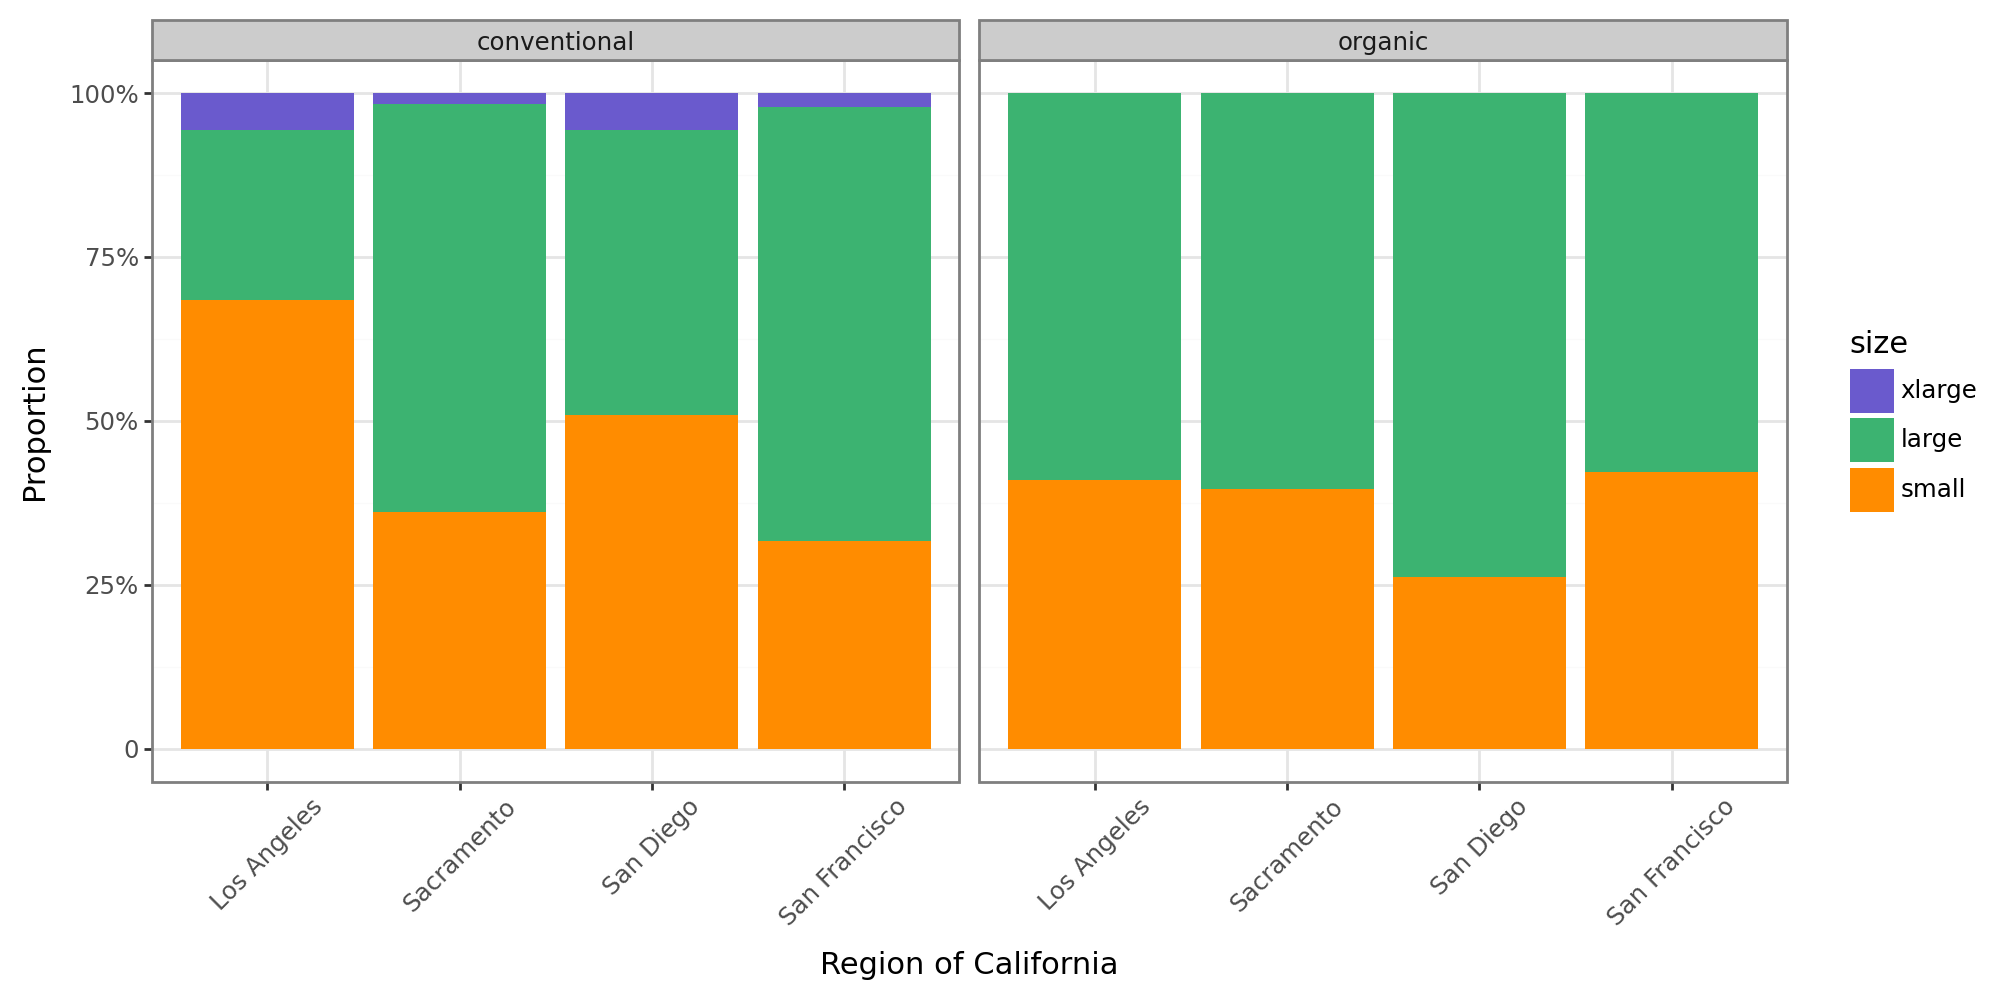

In [119]:
data_size_ca['size'] = pd.Categorical(data_size_ca['size'], categories=['xlarge', 'large', 'small'], ordered=True)

(ggplot(data_size_ca, aes(x='geography', y='proportion', fill='size'))
+ geom_bar(stat='identity',position="fill")
+ facet_wrap('~type')
+ scale_fill_manual(values={'xlarge':'slateblue', 'large':'mediumseagreen', 'small':'darkorange'})
+ labs(x= "Region of California", y="Proportion")
+ theme_bw()
+ theme(figure_size=(10, 5),axis_text_x=element_text(rotation=45))
+ scale_y_continuous(breaks=[0, 0.25, 0.5, 0.75,1], labels=[0, '25%', '50%', '75%','100%'],limits=(0, 1))
)

### Using Outside Data

Data source: https://data.census.gov/  
Report: DP04 SELECTED HOUSING CHARACTERISTICS  
Year: 2015, 2016, 2017, 2018, 2019, 2021  
Value row: HOUSE VALUE Median and GROSS RENT Median

We used data from the Census report DP04, focusing on the median house value and median gross rent for the years 2015, 2016, 2017, 2018, 2019, and 2021. Since data for 2020 was missing, we decided to use the average of 2019 and 2021 as the value for 2020.


In [120]:
house = pd.read_csv('CA house median clean.csv')
house = house.pivot_table(index=['year', 'city'], columns='Label', values='price').reset_index()

#create 2020 data by taking average of 2019 and 2021
house2020 = house[(house['year'] == 2019) | (house['year'] == 2021)]
house2020 = house2020.groupby(['city']).agg({'GROSS RENT Median':'mean','HOUSE VALUE Median':'mean'}).reset_index()
house2020['year'] = 2020

#combine 2020 with original data and takeout 2021
house = pd.concat([house2020,house], ignore_index=True)
house = house[(house['year'] != 2021)]
house['geography'] = house['city']
house = house[['year', 'geography', 'GROSS RENT Median', 'HOUSE VALUE Median']]

#in order to compare the trands of rent and house value, we scale the rent and house value too
house['GROSS RENT Median'] = house['GROSS RENT Median']/100
house['HOUSE VALUE Median'] = house['HOUSE VALUE Median']/100000
house

Label,year,geography,GROSS RENT Median,HOUSE VALUE Median
0,2020,Los Angeles,16.285,7.5500
1,2020,Sacramento,14.595,4.1510
2,2020,San Diego,18.840,7.1360
3,2020,San Francisco,20.630,12.6195
4,2015,Los Angeles,12.710,5.4210
5,2015,Sacramento,10.850,2.8730
6,2015,San Diego,14.440,5.2690
7,2015,San Francisco,16.590,9.4140
8,2016,Los Angeles,13.150,5.9350
9,2016,Sacramento,11.190,3.0690


In [121]:
data_ca_volume = data_clean_ca[['year', 'geography', 'type', 'total_volume_N']]
data_ca_volume = data_ca_volume.groupby(['year', 'geography', 'type']).agg({'total_volume_N':'median'}).reset_index()
data_ca_volume = data_ca_volume.pivot_table(index=['year', 'geography'], columns='type', values='total_volume_N').reset_index()
#scale the volume
data_ca_volume['conventional'] = data_ca_volume['conventional']/100000
data_ca_volume['organic'] = data_ca_volume['organic']/10000


In [122]:
house_avocado =  data_ca_volume.merge(house, on=['year','geography'])
house_avocado

,year,geography,conventional,organic,GROSS RENT Median,HOUSE VALUE Median
0,2015,Los Angeles,27.019978,4.385556,12.710,5.4210
1,2015,Sacramento,4.040638,0.826072,10.850,2.8730
2,2015,San Diego,4.902907,1.036729,14.440,5.2690
3,2015,San Francisco,6.986420,2.074101,16.590,9.4140
4,2016,Los Angeles,31.143338,10.313669,13.150,5.9350
5,2016,Sacramento,4.423603,0.742194,11.190,3.0690
6,2016,San Diego,5.670215,1.512104,15.520,5.6740
7,2016,San Francisco,8.003735,2.415936,17.840,10.2400
8,2017,Los Angeles,28.328499,8.684572,13.970,6.4700
9,2017,Sacramento,4.285533,0.666268,12.150,3.3590


In [123]:
house_avocado = house_avocado.melt(id_vars=['year', 'geography'], 
                        value_vars=['conventional', 'organic', 'GROSS RENT Median', 'HOUSE VALUE Median'],
                        var_name='type', value_name='value')

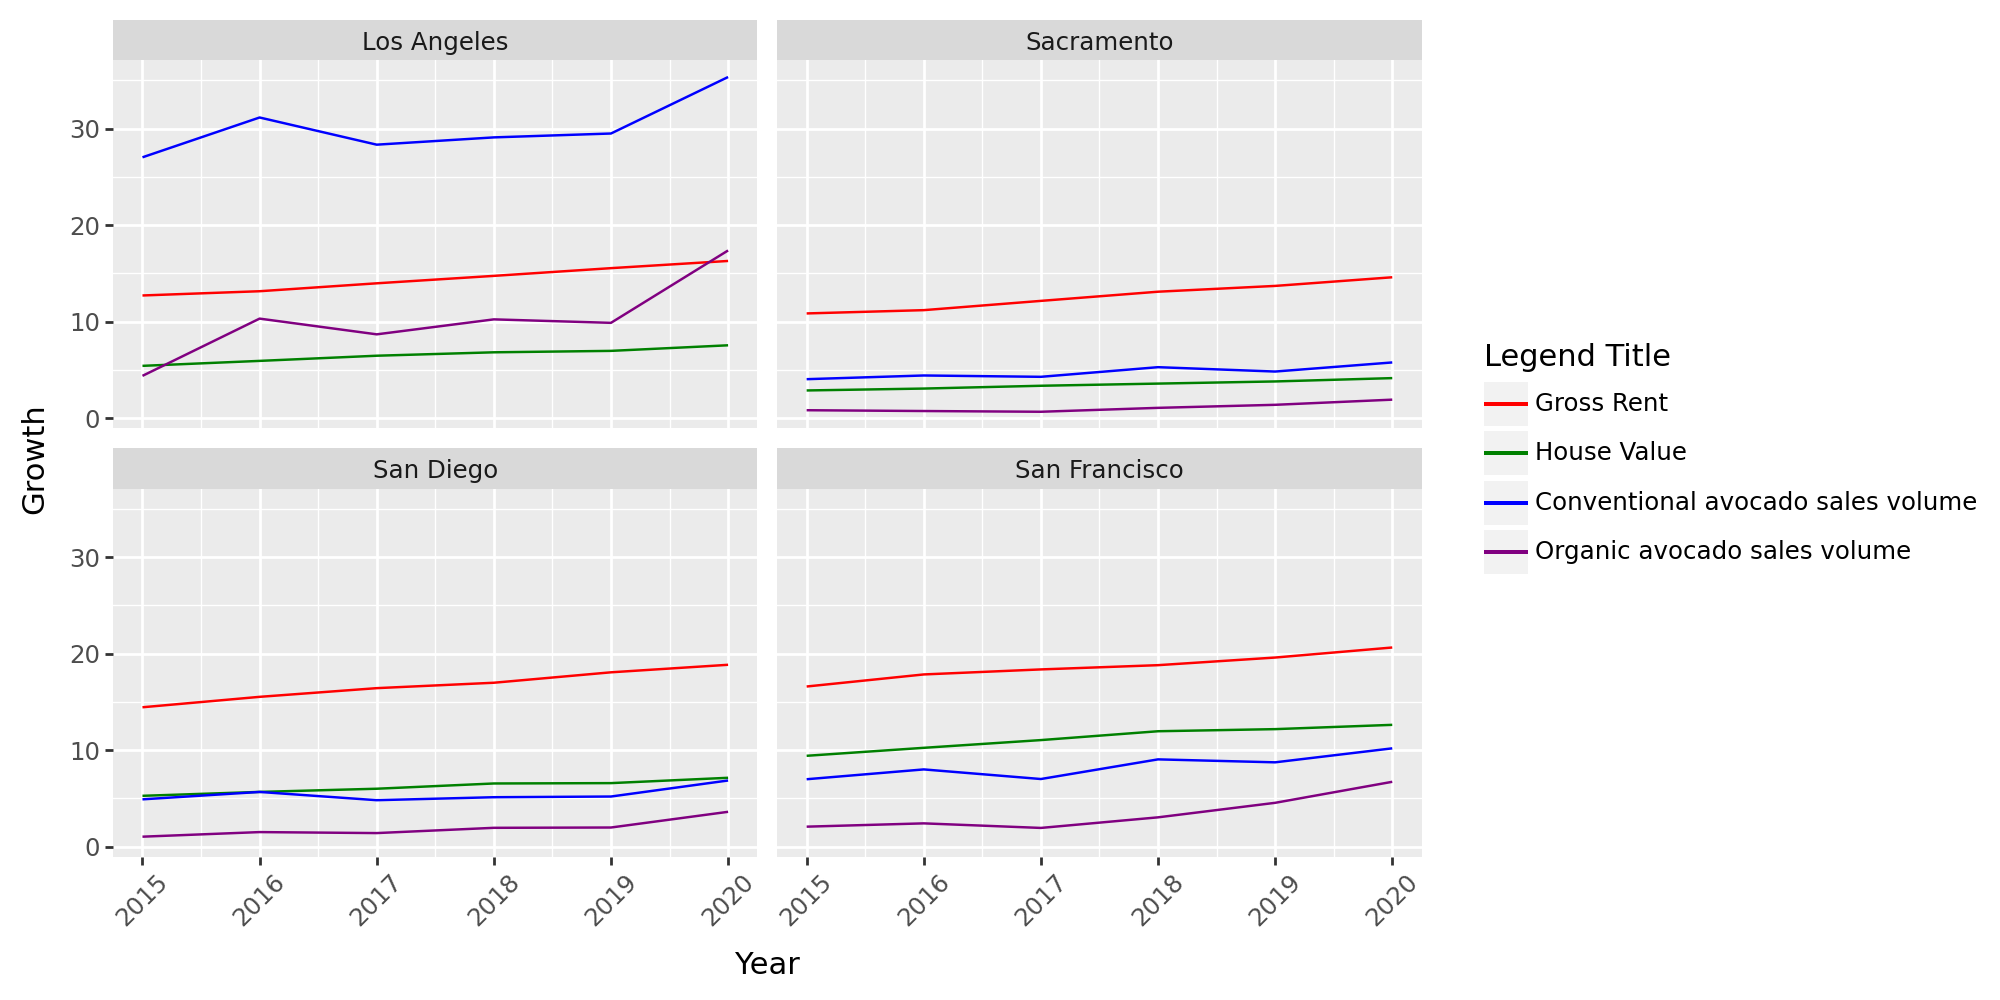

In [125]:
(ggplot(house_avocado, aes(x='year', y='value', color='type'))
+ geom_line()
+ facet_wrap('~ geography')
+ scale_color_manual(name='Legend Title', 
                    labels=['Gross Rent', 'House Value', 'Conventional avocado sales volume', 'Organic avocado sales volume'],
                    values=['red', 'green', 'blue', 'purple'])
+ labs(x= "Year", y="Growth")
+ theme(figure_size=(10, 5),axis_text_x=element_text(rotation=45))
)



We are using the medians of Gross Rent, House Value, Conventional avocado sales volume, and Organic avocado sales volume from 2015 to 2020 across four regions in California. Our goal is to compare the trends of these four metrics, so we scaled them to be within a similar range.  

From the plot, we observe that house values, rent, and avocado sales volumes all increased between 2015 and 2020. One possible interpretation is that rising house prices have made homeownership more difficult. However, we cannot conclude that people are unable to buy homes because they are spending more on avocados.

### Sources
Assistance was provided by ChatGPT for guidance on coding functions and code fixing.